1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

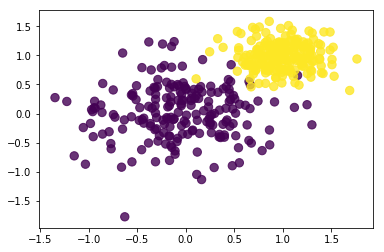

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from matplotlib.ticker import MaxNLocator

import warnings
warnings.filterwarnings("ignore", message=r"elementwise", category=FutureWarning)

## Task 1

In [3]:
np.random.seed(2021)

# array lenght
N = 500
# sigma of the gaussian distr
SIGMA = 1
# mean of the gaussian distr
MU = 0

# alternatively we could use numpy.random.normal
x = scipy.stats.norm.rvs(size=N, loc=MU, scale=SIGMA)


In [4]:
# number of bins
BINS  = round(np.sqrt(N)/10) * 10    # rounding to the nearest multiple of 10

# define plot range and grid
xmin  = MU-5*SIGMA
xmax  = MU+5*SIGMA
xgrid = np.linspace(xmin, xmax, N)

# binning data using numpy
# I find more useful to bin data before plotting it instead of directly using matplotlib to bin data
# usually it allows me to maipulate better my already binned data 
hist, edges = np.histogram(x, bins=BINS)

# extract informations on the binning
binswidth = edges[1]-edges[0]
bincenters = 0.5 * (edges[1:]+edges[:-1])

# poisson errors
err = np.sqrt(hist)


In [5]:
# default parameters match the requested default std
def gaussian_std(x, std=x.std(), const=1.06, power=-1./5):
    """this function returns the standard deviation to employ when generating gaussians to compute kde"""
    return const * std * x.shape[0]**power 

# generate a 2Darray having gaussians as columns 
gaussian_mat = np.array([
    scipy.stats.norm.pdf(xgrid, loc=entry, scale=gaussian_std(x)) 
    for entry in x
]).T

In [6]:
# sum the values of each gaussian 
gauss_sum = np.sum(gaussian_mat, axis=1)
# compute the kde by normalizing correctly the sums of the gaussians
kde =  ( gauss_sum ) * N * binswidth / scipy.integrate.trapz(gauss_sum, xgrid) 

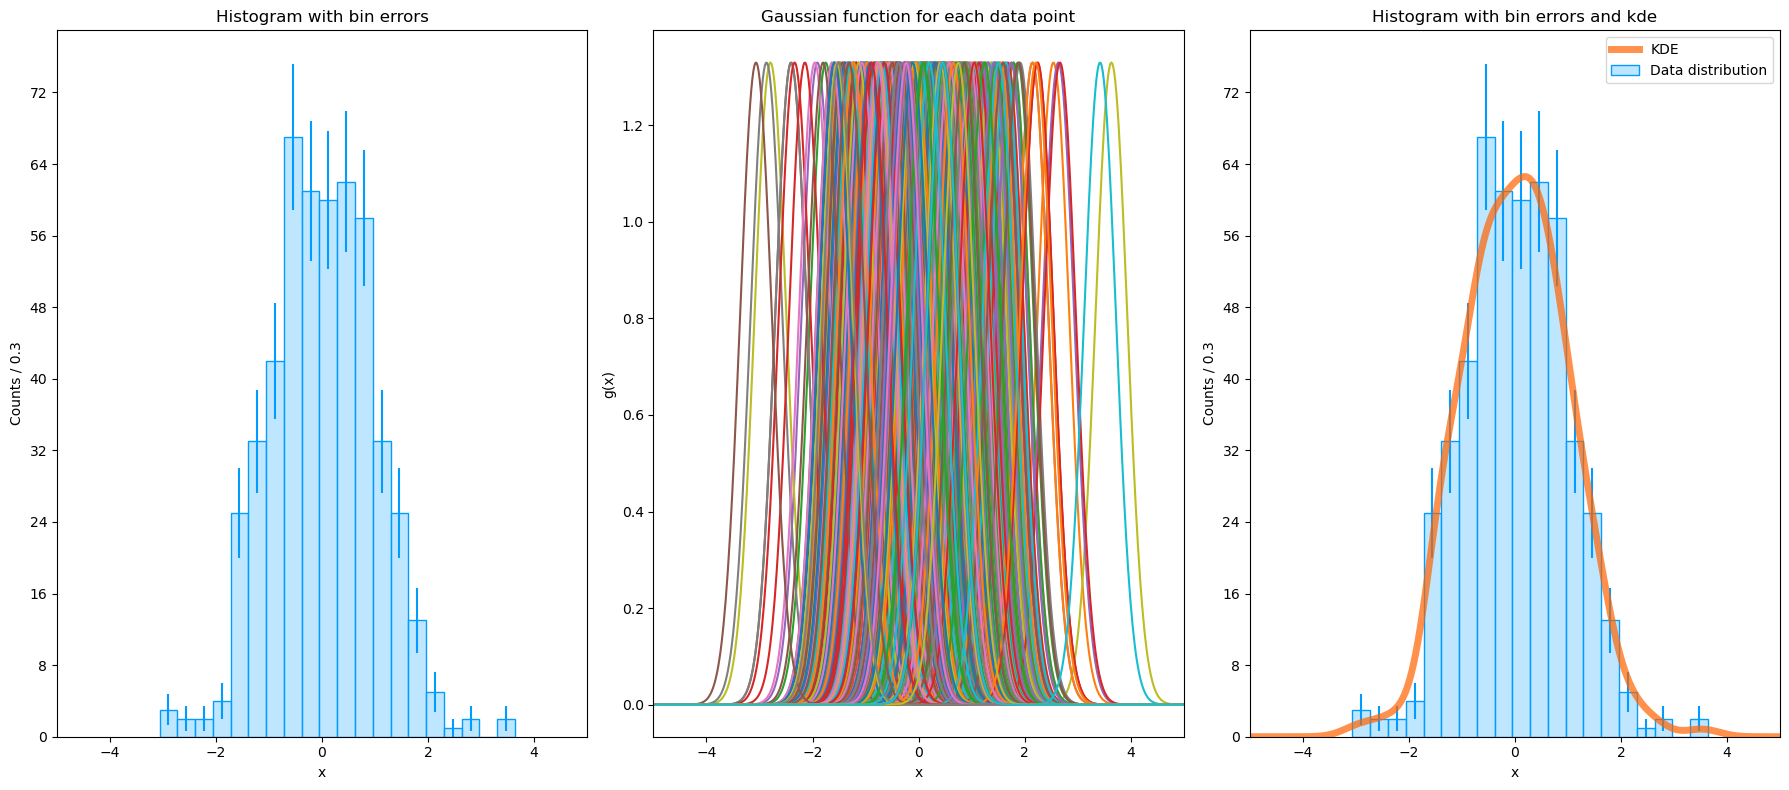

In [8]:
# in this cell we deal with the actual plots

fig, ax = plt.subplots(nrows=1, ncols=3, sharex="row", figsize=(18,8))

################## LEFT PLOT

ax[0].set_xlim(left=xmin, right=xmax)
ax[0].yaxis.set_major_locator(MaxNLocator(integer=True))

ax[0].set_title("Histogram with bin errors")
ax[0].set_xlabel("x")
ax[0].set_ylabel(f"Counts / {binswidth:.1f}")

# histogram
sns.histplot(
    x=edges[:-1],
    weights=hist,
    bins=edges,
    color="#aadeff",
    edgecolor="#009cff",
    ax=ax[0]
)

# errorbars
ax[0].errorbar(
    bincenters, 
    hist, 
    yerr=err,
    linestyle="None",
    color="#009cff",
)

################## CENTRAL PLOT
# this plot is not aesthetically tuned as I don't really understand what kind of information I'm trying to convey
# I'm assuming it is just a check plot to see whether the procedure is working or there are some mistakes
# thus i'm leaving it quite simple..
ax[1].set_title("Gaussian function for each data point")
ax[1].set_xlabel("x")
ax[1].set_ylabel("g(x)")

# gaussians
ax[1].plot(
    xgrid, 
    gaussian_mat
)

################## RIGHT PLOT

ax[2].set_title("Histogram with bin errors and kde")
ax[2].set_xlabel("x")
ax[2].set_ylabel(f"Counts / {binswidth:.1f}")
ax[2].sharey(ax[0])

# histogram
sns.histplot(
    x=edges[:-1],
    weights=hist,
    bins=edges,
    color="#aadeff",
    edgecolor="#009cff",
    ax=ax[2],
    label="Data distribution",
)

# errorbars
ax[2].errorbar(
    bincenters, 
    hist, 
    yerr=err,
    linestyle="None",
    color="#009cff",
)

# kde
ax[2].plot(
    xgrid, 
    kde, 
    linewidth=5,
    color="#ff6300",
    alpha=0.7,
    label="KDE"
)

# add a legend in this right plot as multiple objects are being shown
ax[2].legend(loc="upper right")

fig.tight_layout()
plt.show()

## Task 2

In [9]:
# let's make a class that deals with generating our features
class NormGenerator:
    """this class generates 2D-normal distributions"""
    
    # number of dimensions for the gaussian distribution
    # we want a 2D gaussian distribution so we set dimensions = 2
    dimensions: int = 2
    
    # constructor
    def __init__(
        self, 
        mu: tuple, 
        cov: tuple = None, 
        sigma: tuple = None, 
        diag_cov: bool = True, 
        size: int = 1000
    ) -> None:
        
        # if we do not provide neither the covariance matrix nor the standard deviations
        # then just initialize a default covariance matrix
        if not cov or not sigma:
            cov = ( (1,0), (0,1) )
        
        # if we provide standard deviations and we want a diagonal cov_matrix then just
        # fill the diagonal with the square of the two sigmas
        if sigma and diag_cov:
            cov = ( (sigma[0]**2,0),  (0,sigma[1]**2) )
        
        # if we provade the covariance matrix but we want a diagonal one
        # then simply set the covariances to zero
        if cov   and diag_cov:
            cov = ( (cov[0][0],0), (0,cov[1][1]) )
        
        # otherwise, if diag_cov is False we can provide a full covariance matrix and use it entirely
        # but we need to check whether it is symmetrical or not
        if cov and not diag_cov:
            if cov[0][1] != cov[1][0]:
                cov = ( (cov[0][0],cov[0][1]), (cov[0][1],cov[1][1]) )
        
        # store parameters
        self.mu:         tuple = mu
        self.cov:        tuple = cov
        self.size:         int = size

    # generate sample
    def generate_sample(self) -> np.ndarray:
        return scipy.stats.multivariate_normal.rvs(mean=self.mu, cov=self.cov, size=self.size )

In [10]:
class DataBuilder:
    
    def __init__(self):
        self.dataset = []
    
    def build_dataset(self, generators: list):
        for generator in generators:
            self.dataset.append(generator.generate_sample())
        return self.dataset

In [11]:
# list of 2d normal distributions
# we can add as many as we want
# and the interface is quite simple to use! 
generators = [
    # we can define a generator by setting only the two mean values
    NormGenerator( mu=(1, 2), size=1000 ),  
    # we can define a generator by setting the two mean values and the two standard deviations
    NormGenerator( mu=(3, 6), sigma=(1.3, 1.5), size=500 ),   
    # we can define a generator by setting the two mean values and the entire covariance matrix
    NormGenerator( mu=(6, 0), cov=((1.6, 1.5), (1.5, 0.9)), diag_cov=False, size=100 ),   
]

# here we build our dataset
# note that we allowed the possibility to have different sized features!
data = DataBuilder().build_dataset(generators=generators)

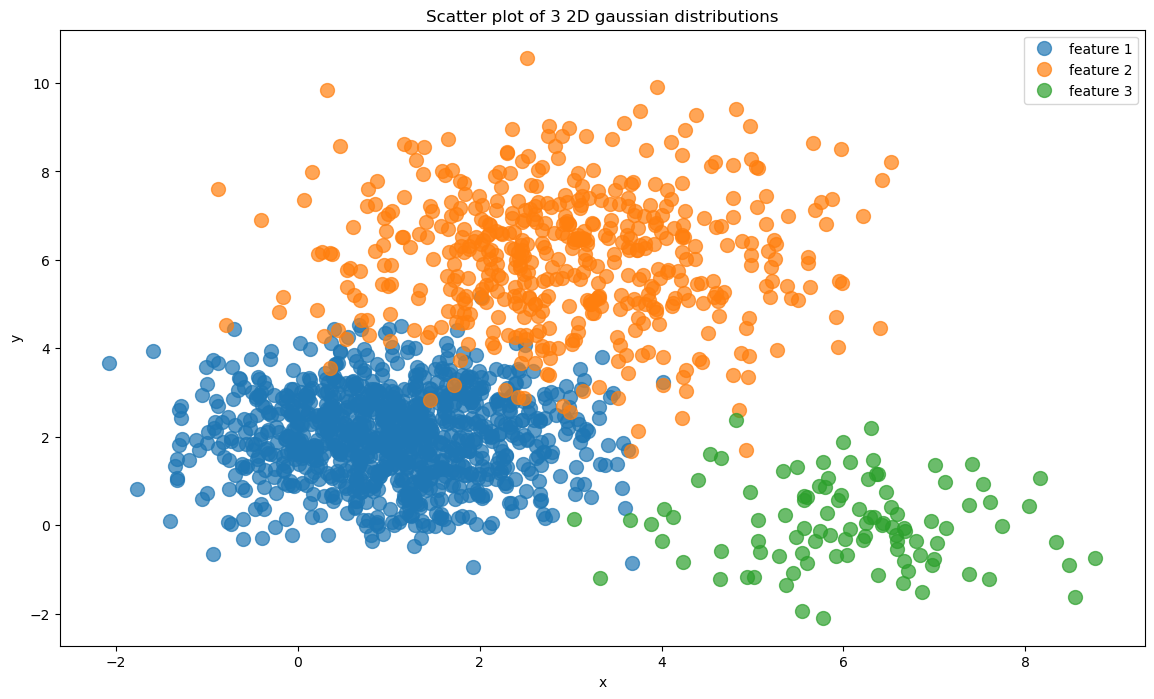

In [12]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(f"Scatter plot of {len(data)} 2D gaussian distributions")

# we simply need to loop over the features in our dataset 
# and plot the second dimension against the first dimension
for i, feature in enumerate(data):
    ax.plot(
        feature[:,0], 
        feature[:,1], 
        ls="", 
        marker="o",
        markersize=10,
        alpha=0.7, 
        label=f"feature {i+1}"
    )
    
ax.legend()
plt.show()

## Task 3

In [16]:
# load the data file
data_file = "./data/residuals_261.npy"
data = np.load(data_file, allow_pickle=True)
df = pd.DataFrame(data.item())

# clean dataset
df = df[abs(df["residuals"]) < 2.]

df.describe()

,residuals,distances
count,10489.000000,10489.000000
mean,-0.121878,9.954824
std,0.439143,5.847142
min,-2.000000,0.000000
25%,-0.280000,4.700000
50%,-0.100000,10.000000
75%,0.070000,15.100000
max,1.992857,24.900000


In [54]:
# perform a linear regression using scipy.stats.linregress
reg_results = scipy.stats.linregress(df["distances"], df["residuals"])

# bin the x data
bins = np.linspace(0, 20, 9)
# we add a column to our dataframe so we can use pandas.DataFrame.groupby()
df["bin"] = np.digitize(df["distances"], bins=bins)

# bin centers
x    = 0.5 * (bins[1:] + bins[:-1])
# mean of y data inside each bin
y    = df.groupby("bin")["residuals"].mean()
# std of y data inside each bin
erry = df.groupby("bin")["residuals"].std()

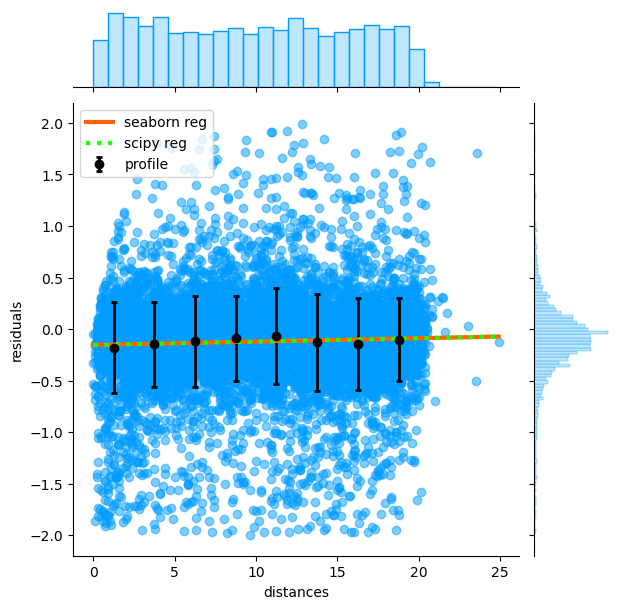

In [109]:
# allow me to plit the joinplot into its pieces
# I personally prefer it so I have more room for personalization
g = sns.JointGrid()

# top histogram
sns.histplot(
    data=df,
    x="distances",
    color="#aadeff",
    edgecolor="#009cff",
    ax=g.ax_marg_x
)

# right istogram
sns.histplot(
    data=df,
    y="residuals",
    color="#aadeff",
    edgecolor="#009cff",
    ax=g.ax_marg_y
)

# scatterplot with regression
sns.regplot( 
    data=df,
    x="distances",
    y="residuals",
    fit_reg=True,
    scatter_kws={
        "color": "#009cff",
        "alpha": 0.5
    },
    line_kws={
        "color": "#ff6300",
        "linewidth": 3,
        "alpha": 1,
        "label": "seaborn reg"
    },
    ax=g.ax_joint
)

# profile plot
g.ax_joint.errorbar(
    x, 
    y[:-1], 
    yerr=erry[:-1], 
    color="black",
    ecolor ="black", 
    elinewidth=2,
    capsize=2,
    capthick=2,
    marker="o", 
    linestyle="",
    alpha=1,
    label = "profile", 
)

# scipy.stats.linregress plot
xgrid = np.linspace(df["distances"].min(), df["distances"].max(), 300)
g.ax_joint.plot(
    xgrid,    
    reg_results.intercept + reg_results.slope*xgrid, 
    color = "#1dff00", 
    linestyle = "dotted", 
    linewidth = 3, 
    label="scipy reg"
)

g.ax_joint.legend()
plt.show()